In [1]:
# Importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Database connection
connection = sqlite3.connect("travel.sqlite")
cursor = connection.cursor()

In [3]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print("List of tables")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data exploration

In [4]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [6]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [7]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [8]:
flights = pd.read_sql_query("select * from flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [9]:
seats = pd.read_sql_query("select * from seats", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [10]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [11]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [12]:
for table in table_list:
    print("\ntable:", table)
    column_info = cursor.execute("PRAGMA table_info({})".format(table))
    for column in column_info:
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [13]:
for table in table_list:
    print("\ntable:", table)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())
    


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic analysis

### No.of aircrafts having more than 100 seats

In [14]:
pd.read_sql_query("""select aircraft_code, count(*) as total_seats
                      from seats
                      group by aircraft_code having total_seats > 100""", connection)


,aircraft_code,total_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### No.of tickets booked and total amount changed across time (days)

In [15]:
tickets_df = pd.read_sql_query("""select * from tickets inner join bookings
                                    on tickets.book_ref = bookings.book_ref""", connection)
# Changing the data type of tickets.book_date to datetime
tickets_df["book_date"] = pd.to_datetime(tickets_df["book_date"])

# Adding an extra columnn ("Date") for analysis
tickets_df["Date"] = tickets_df["book_date"].dt.date
tickets_df

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,Date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


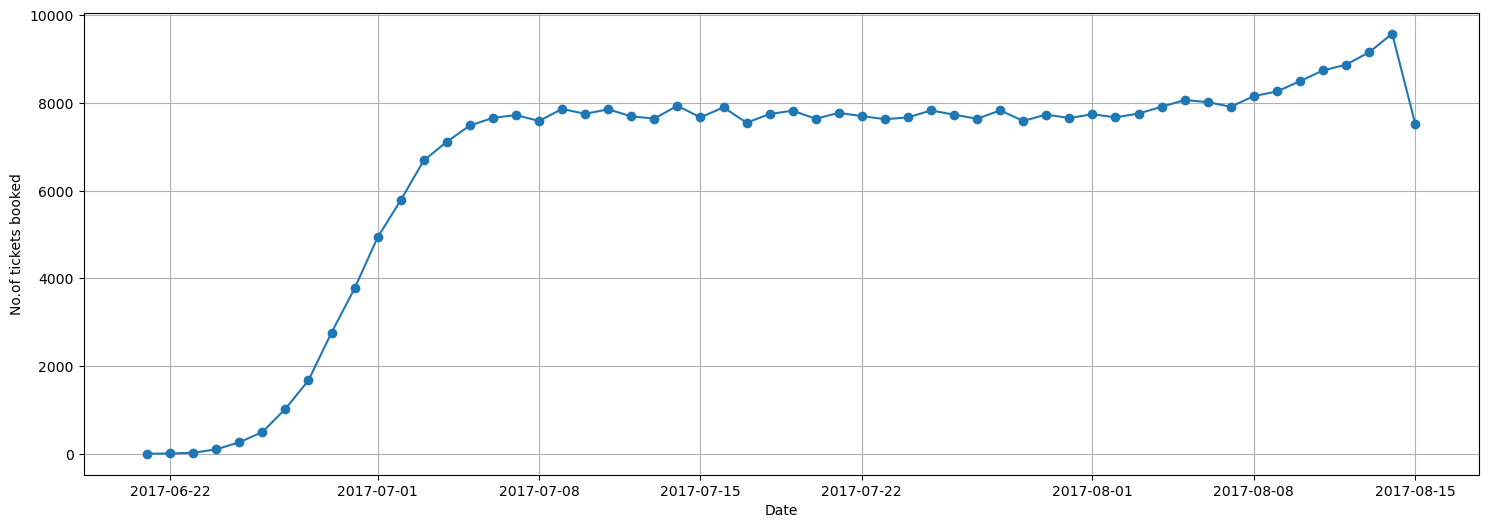

In [16]:
# No.of tickets booked per day
x = tickets_df.groupby("Date")[["Date"]].count()

# Visual representation of the data
plt.figure(figsize = (18,6))
plt.plot(x.index, x["Date"], marker = "o")
plt.xlabel("Date")
plt.ylabel("No.of tickets booked")
plt.grid("True")
plt.show()

In [17]:
booking_df = pd.read_sql_query("""select * from bookings""", connection)

# Changing the data type of book_date to datetime
booking_df["book_date"] = pd.to_datetime(booking_df["book_date"])

# Adding an extra columnn ("Date") for analysis
booking_df["Date"] = booking_df["book_date"].dt.date
booking_df

,book_ref,book_date,total_amount,Date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


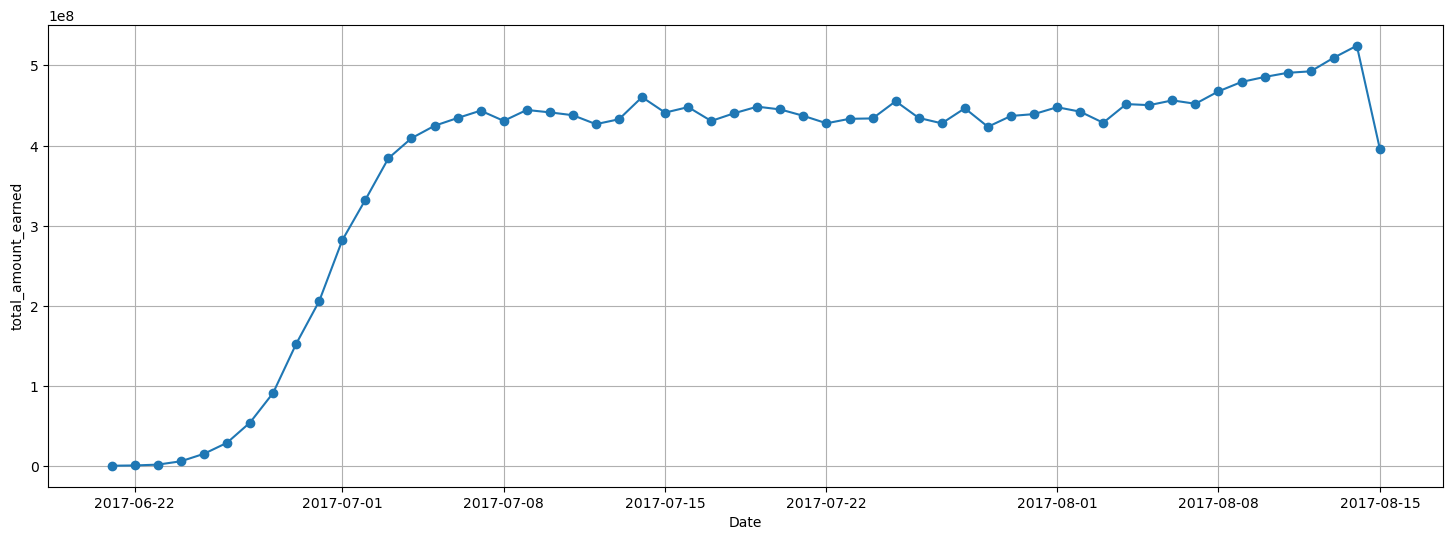

In [18]:
# Total_amount earned per day
y = booking_df.groupby("Date")[["total_amount"]].sum()

#Visual representation of the data
plt.figure(figsize = (18,6))
plt.plot(y.index, y["total_amount"], marker = "o")
plt.xlabel("Date")
plt.ylabel("total_amount_earned")
plt.grid("True")
plt.show()

### Average charges for each aircraft by different fare conditions

<Axes: xlabel='aircraft_code', ylabel='average_charges'>

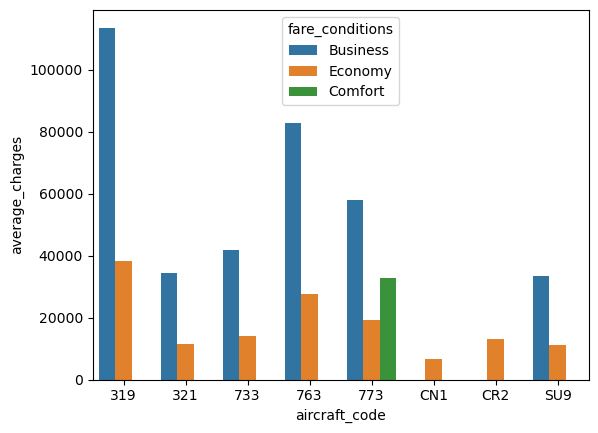

In [19]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code, avg(amount) as average_charges 
                            from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id
                            group by aircraft_code, fare_conditions""", connection)

# Visual representation of the data
sns.barplot(data = df, x = "aircraft_code", y = "average_charges", hue = "fare_conditions")

# Punctuality analysis

In [20]:
punctuality_df = pd.read_sql_query("""select flight_id, departure_airport, arrival_airport, scheduled_departure, actual_departure,
                        scheduled_arrival, actual_arrival, status  
                    from flights
                    where status != 'Cancelled' and status != 'Scheduled' and status != 'Delayed' """, connection)
punctuality_df

,flight_id,departure_airport,arrival_airport,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,status
0,1,DME,LED,2017-07-16 09:35:00+03,2017-07-16 09:44:00+03,2017-07-16 10:30:00+03,2017-07-16 10:39:00+03,Arrived
1,2,DME,LED,2017-08-05 19:05:00+03,2017-08-05 19:06:00+03,2017-08-05 20:00:00+03,2017-08-05 20:01:00+03,Arrived
2,3,DME,LED,2017-08-05 09:35:00+03,2017-08-05 09:39:00+03,2017-08-05 10:30:00+03,2017-08-05 10:34:00+03,Arrived
3,5,DME,LED,2017-08-16 09:35:00+03,\N,2017-08-16 10:30:00+03,\N,On Time
4,8,DME,LED,2017-08-16 12:25:00+03,\N,2017-08-16 13:20:00+03,\N,On Time
...,...,...,...,...,...,...,...,...
17278,33115,SKX,SVO,2017-08-08 19:25:00+03,2017-08-08 19:27:00+03,2017-08-08 20:10:00+03,2017-08-08 20:12:00+03,Arrived
17279,33116,SKX,SVO,2017-08-15 19:25:00+03,\N,2017-08-15 20:10:00+03,\N,On Time
17280,33117,SKX,SVO,2017-08-02 19:25:00+03,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,2017-08-02 20:10:00+03,Arrived
17281,33118,SKX,SVO,2017-07-28 19:25:00+03,2017-07-28 19:30:00+03,2017-07-28 20:10:00+03,2017-07-28 20:15:00+03,Arrived


In [21]:
# Handling the null values in actual_arrival column for the departed flights
departed_flights = punctuality_df[punctuality_df['status'] == 'Departed']

# Converting the data type to datetime
departed_flights['scheduled_departure'] = pd.to_datetime(departed_flights['scheduled_departure'])
departed_flights['actual_departure'] = pd.to_datetime(departed_flights['actual_departure'])
departed_flights['scheduled_arrival'] = pd.to_datetime(departed_flights['scheduled_arrival'])

# Calculating the time_difference between scheduled_departure and actual_departure
time_difference = departed_flights['actual_departure'] - departed_flights['scheduled_departure']

In [22]:
departed_flights['est_arrival_time'] = departed_flights['scheduled_arrival'] + time_difference

# Updating in punctuality_df
punctuality_df.loc[punctuality_df['status'] == 'Departed', 'actual_arrival'] = departed_flights['est_arrival_time']
punctuality_df.loc[punctuality_df['status'] == 'Departed', 'status'] = 'Arrived'
punctuality_df.loc[punctuality_df['status'] == 'On Time', 'actual_arrival'] = punctuality_df['scheduled_arrival']
punctuality_df.loc[punctuality_df['status'] == 'On Time', 'actual_departure'] = punctuality_df['scheduled_departure']
punctuality_df

,flight_id,departure_airport,arrival_airport,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,status
0,1,DME,LED,2017-07-16 09:35:00+03,2017-07-16 09:44:00+03,2017-07-16 10:30:00+03,2017-07-16 10:39:00+03,Arrived
1,2,DME,LED,2017-08-05 19:05:00+03,2017-08-05 19:06:00+03,2017-08-05 20:00:00+03,2017-08-05 20:01:00+03,Arrived
2,3,DME,LED,2017-08-05 09:35:00+03,2017-08-05 09:39:00+03,2017-08-05 10:30:00+03,2017-08-05 10:34:00+03,Arrived
3,5,DME,LED,2017-08-16 09:35:00+03,2017-08-16 09:35:00+03,2017-08-16 10:30:00+03,2017-08-16 10:30:00+03,On Time
4,8,DME,LED,2017-08-16 12:25:00+03,2017-08-16 12:25:00+03,2017-08-16 13:20:00+03,2017-08-16 13:20:00+03,On Time
...,...,...,...,...,...,...,...,...
17278,33115,SKX,SVO,2017-08-08 19:25:00+03,2017-08-08 19:27:00+03,2017-08-08 20:10:00+03,2017-08-08 20:12:00+03,Arrived
17279,33116,SKX,SVO,2017-08-15 19:25:00+03,2017-08-15 19:25:00+03,2017-08-15 20:10:00+03,2017-08-15 20:10:00+03,On Time
17280,33117,SKX,SVO,2017-08-02 19:25:00+03,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,2017-08-02 20:10:00+03,Arrived
17281,33118,SKX,SVO,2017-07-28 19:25:00+03,2017-07-28 19:30:00+03,2017-07-28 20:10:00+03,2017-07-28 20:15:00+03,Arrived


### Calculating the delays in minutes

In [23]:
# Changing the data type
punctuality_df['scheduled_departure'] = pd.to_datetime(punctuality_df['scheduled_departure'])
punctuality_df['actual_departure'] = pd.to_datetime(punctuality_df['actual_departure'])
punctuality_df['scheduled_arrival'] = pd.to_datetime(punctuality_df['scheduled_arrival'])
punctuality_df['actual_arrival'] = pd.to_datetime(punctuality_df['actual_arrival'])

In [24]:
# Departure and arrival delays
punctuality_df['departure_delay'] = (punctuality_df['actual_departure'] - punctuality_df['scheduled_departure']).dt.total_seconds()/60
punctuality_df['arrival_delay'] = (punctuality_df['actual_arrival'] - punctuality_df['scheduled_arrival']).dt.total_seconds()/60
punctuality_df

,flight_id,departure_airport,arrival_airport,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,status,departure_delay,arrival_delay
0,1,DME,LED,2017-07-16 09:35:00+03:00,2017-07-16 09:44:00+03:00,2017-07-16 10:30:00+03:00,2017-07-16 10:39:00+03:00,Arrived,9.0,9.0
1,2,DME,LED,2017-08-05 19:05:00+03:00,2017-08-05 19:06:00+03:00,2017-08-05 20:00:00+03:00,2017-08-05 20:01:00+03:00,Arrived,1.0,1.0
2,3,DME,LED,2017-08-05 09:35:00+03:00,2017-08-05 09:39:00+03:00,2017-08-05 10:30:00+03:00,2017-08-05 10:34:00+03:00,Arrived,4.0,4.0
3,5,DME,LED,2017-08-16 09:35:00+03:00,2017-08-16 09:35:00+03:00,2017-08-16 10:30:00+03:00,2017-08-16 10:30:00+03:00,On Time,0.0,0.0
4,8,DME,LED,2017-08-16 12:25:00+03:00,2017-08-16 12:25:00+03:00,2017-08-16 13:20:00+03:00,2017-08-16 13:20:00+03:00,On Time,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17278,33115,SKX,SVO,2017-08-08 19:25:00+03:00,2017-08-08 19:27:00+03:00,2017-08-08 20:10:00+03:00,2017-08-08 20:12:00+03:00,Arrived,2.0,2.0
17279,33116,SKX,SVO,2017-08-15 19:25:00+03:00,2017-08-15 19:25:00+03:00,2017-08-15 20:10:00+03:00,2017-08-15 20:10:00+03:00,On Time,0.0,0.0
17280,33117,SKX,SVO,2017-08-02 19:25:00+03:00,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03:00,2017-08-02 20:10:00+03:00,Arrived,0.0,0.0
17281,33118,SKX,SVO,2017-07-28 19:25:00+03:00,2017-07-28 19:30:00+03:00,2017-07-28 20:10:00+03:00,2017-07-28 20:15:00+03:00,Arrived,5.0,5.0


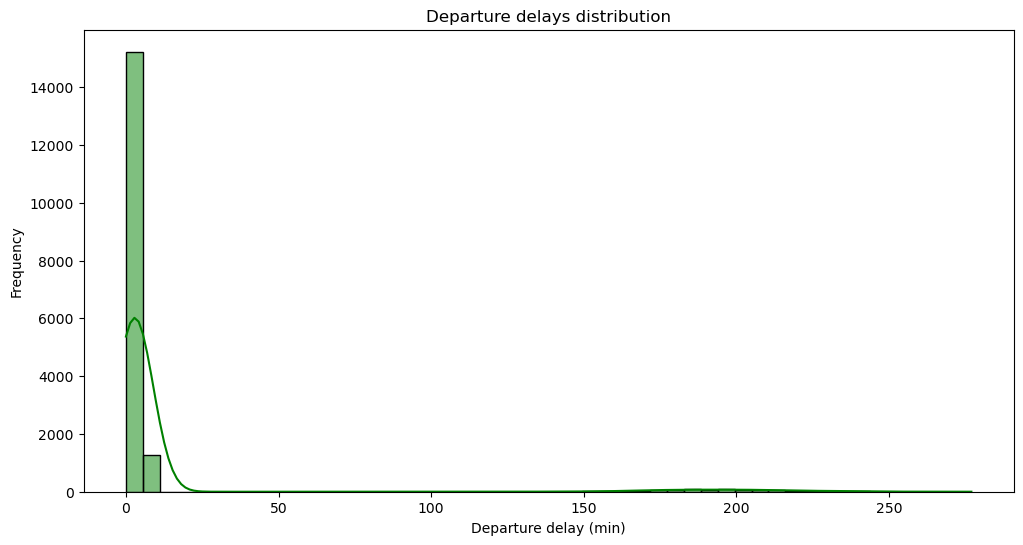

In [25]:
# Analyzing the distribution of departure_delays
plt.figure(figsize = (12,6))
sns.histplot(punctuality_df['departure_delay'], bins=50, color='green', kde=True)
plt.xlabel('Departure delay (min)')
plt.ylabel('Frequency')
plt.title('Departure delays distribution')
plt.show()

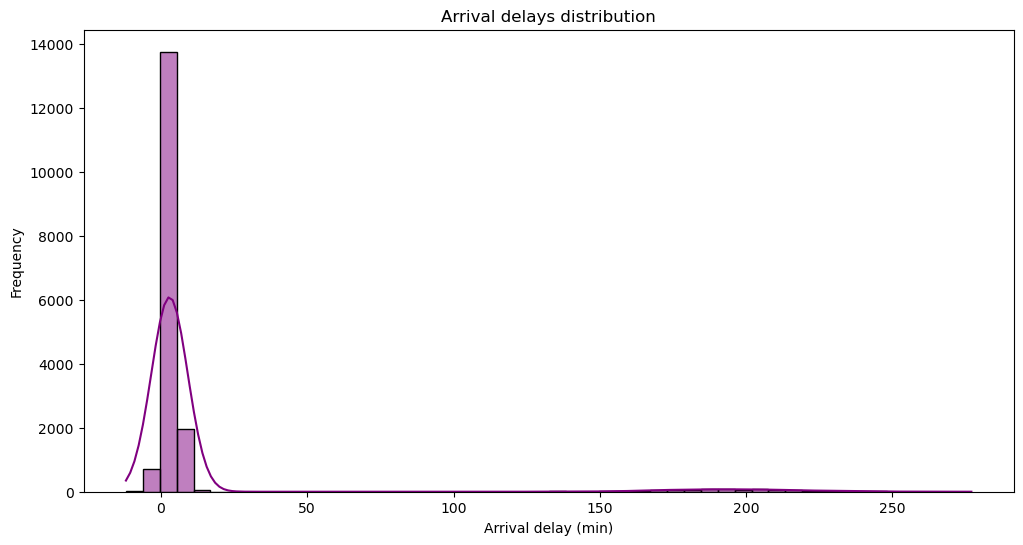

In [26]:
# Analyzing the distribution of arrival delays
plt.figure(figsize = (12,6))
sns.histplot(punctuality_df['arrival_delay'], bins=50, color='purple', kde=True)
plt.xlabel('Arrival delay (min)')
plt.ylabel('Frequency')
plt.title('Arrival delays distribution')
plt.show()

### Delayed flights by airport

In [27]:
delayed_flights_df = flights[flights['status'] == 'Delayed']
delayed_flights_by_airport = delayed_flights_df.groupby('departure_airport').size()
delayed_flights_by_airport

departure_airport
ABA    1
AER    1
ARH    1
BAX    1
BZK    1
DME    6
EGO    1
HMA    1
KRR    1
KUF    2
KXK    1
KZN    2
LED    3
MCX    1
NAL    1
NUX    1
OVS    1
PKV    1
ROV    1
SGC    1
SVO    6
SVX    1
TBW    1
ULV    1
VKO    1
VKT    1
YKS    1
dtype: int64

# Route performance analysis

In [28]:
route_performance_df = pd.read_sql_query("""select a.aircraft_code, f.departure_airport, f.arrival_airport, 
                                                count(tf.ticket_no) as total_tickets, sum(tf.amount) as total_revenue
                                            from aircrafts_data as a join flights as f on a.aircraft_code = f.aircraft_code
                                            join ticket_flights as tf on f.flight_id = tf.flight_id
                                            group by 2,3""", connection)
route_performance_df

,aircraft_code,departure_airport,arrival_airport,total_tickets,total_revenue
0,SU9,AAQ,EGO,4248,33617400
1,733,AAQ,SVO,5254,76468400
2,319,ABA,DME,978,43620400
3,CN1,ABA,OVB,437,2534600
4,CN1,ABA,TOF,488,2391200
...,...,...,...,...,...
452,CR2,VVO,IKT,428,9835400
453,SU9,VVO,KHV,3930,30490200
454,763,VVO,VKO,1648,135061000
455,319,YKS,LED,638,42411400


### Most profitable routes

In [29]:
most_profitable_routes = route_performance_df.sort_values(by='total_revenue', ascending = False).head(10)

<Figure size 1200x800 with 0 Axes>

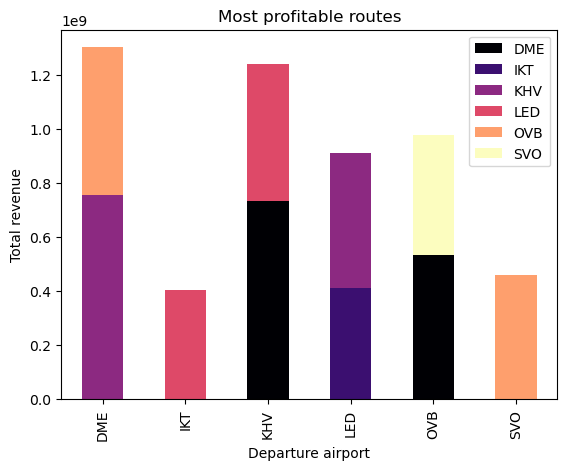

In [30]:
# Visual representation of most profitable routes
ax = most_profitable_routes.pivot_table(index='departure_airport', columns='arrival_airport', values='total_revenue')
plt.figure(figsize=(12,8))
ax.plot(kind='bar', stacked=True, colormap='magma')
plt.xlabel('Departure airport')
plt.ylabel('Total revenue')
plt.title('Most profitable routes')
plt.legend(title = 'arrival_airport')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.show()

### Least profitable routes

In [31]:
least_profitable_routes = route_performance_df.sort_values(by='total_revenue').head(10)

<Figure size 1200x800 with 0 Axes>

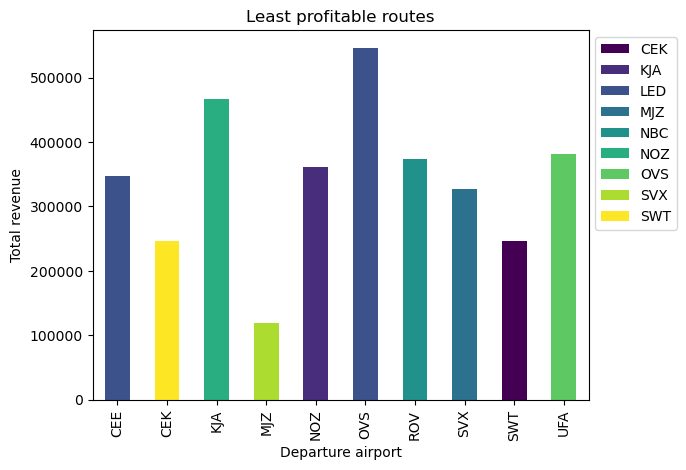

In [32]:
# Visual representation of least profitable routes
ax = least_profitable_routes.pivot_table(index='departure_airport', columns='arrival_airport', values='total_revenue')
plt.figure(figsize=(12,8))
ax.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Departure airport')
plt.ylabel('Total revenue')
plt.title('Least profitable routes')
plt.legend(title = 'arrival_airport')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.show()

# Occupancy rate analysis

### Total revenue per year and average revenue per ticket for each aircraft

In [38]:
pd.read_sql_query("""select aircraft_code, total_tickets, total_revenue, total_revenue/total_tickets as average_revenue_per_ticket
                        from
                        (select aircraft_code, count(*) as total_tickets, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", connection)

,aircraft_code,total_tickets,total_revenue,average_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


### Average occupancy per aircraft

In [34]:
occupancy_rate = pd.read_sql_query("""with t1 as 
                        (select aircraft_code, flights.flight_id, count(*) as occupied_seats from boarding_passes
                        join flights on boarding_passes.flight_id = flights.flight_id
                        group by aircraft_code, flights.flight_id),
                    t2 as 
                        (select aircraft_code, count(*) as total_seats from seats
                        group by aircraft_code)
                    
                    select t1.aircraft_code, 
                    avg(t1.occupied_seats) as average_occupied_seats, 
                    t2.total_seats, 
                    avg(t1.occupied_seats)/t2.total_seats as occupancy_rate 
                    from t1 join t2 on t1.aircraft_code = t2.aircraft_code
                    group by t1.aircraft_code
                    """, connection)

occupancy_rate

,aircraft_code,average_occupied_seats,total_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


### Calculation of annual turnover with 10% increase in occupancy rate

In [35]:
occupancy_rate["Inc_occupancy_rate"] = occupancy_rate["occupancy_rate"] + occupancy_rate["occupancy_rate"]*0.1
occupancy_rate

,aircraft_code,average_occupied_seats,total_seats,occupancy_rate,Inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [36]:
pd.set_option("display.float_format", str)

In [37]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as revenue from ticket_flights
                                      join flights on ticket_flights.flight_id = flights.flight_id
                                      group by aircraft_code""", connection)

occupancy_rate["Inc_annual_turnover"] = (total_revenue["revenue"]/occupancy_rate["occupancy_rate"])*occupancy_rate["Inc_occupancy_rate"]
occupancy_rate

,aircraft_code,average_occupied_seats,total_seats,occupancy_rate,Inc_occupancy_rate,Inc_annual_turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
